In [18]:
import pandas as pd
import numpy as np

ip_address = pd.read_csv('IpAddress_to_Country.csv')
fraud = pd.read_csv('Fraud_Data.csv')
ip_address.head(5)

lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China

In [5]:
# match an IP address with country name    
def match_country_to_ip(ip=None):
    match = (ip <= ip_address['upper_bound_ip_address']) & ( ip >= ip_address['lower_bound_ip_address'])
    if match.any():
        return ip_address['country'][match].to_string(index=False)
    else:
        return 'unknown'
fraud['country'] = fraud['ip_address'].apply(lambda x: match_country_to_ip(x))
fraud.to_csv('fraud_map_country.csv', index=False)

In [45]:
import pandas as pd
fraud = pd.read_csv('fraud_map_country.csv')
fraud.info()
fraud.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
user_id           151112 non-null int64
signup_time       151112 non-null object
purchase_time     151112 non-null object
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
country           151112 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 13.8+ MB


user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class        country  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0          Japan  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  United States  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  United States  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0        unknown  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  United States

## 'class' analysis

In [10]:
number_of_no_fraud = fraud.groupby('class').size()[0]
number_of_fraud = fraud.groupby('class').size()[1]
print ("Fraud transaction : ", number_of_fraud)
print ("No fraud transaction : ", number_of_no_fraud)

Fraud transaction :  14151
No fraud transaction :  136961


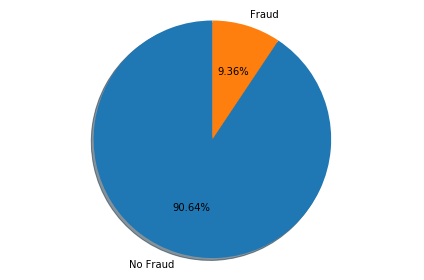

In [13]:
import matplotlib.pyplot as plt

# Pie chart
labels = ['No Fraud', 'Fraud']
sizes = fraud.groupby('class').size()[:2]

explode = (0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

plt.tight_layout()
plt.show()

## 'country' analysis

In [16]:
total_fraud = fraud['class'].sum()
country_fraud = fraud.groupby('country').sum()
sorted_country_fraud = country_fraud['class'].sort_values(ascending=False)
sorted_country_fraud.head(10)

country
United States        5551
unknown              1883
China                1043
Japan                 715
United Kingdom        477
Korea Republic of     380
Canada                348
France                300
Brazil                270
Germany               262
Name: class, dtype: int64

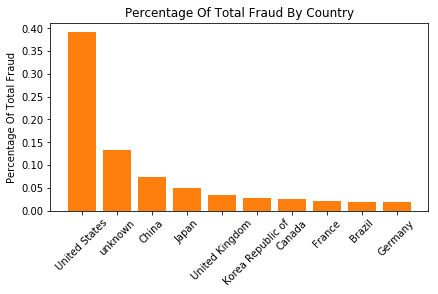

In [19]:
# Bar Chart Fraud By Count    
y = sorted_country_fraud[:10]/float(total_fraud)
x = np.arange(len(y))
    
fig, ax = plt.subplots()

ax.bar(x, y)
ax.bar(x, y)
ax.set_ylabel('Percentage Of Total Fraud')
ax.set_title('Percentage Of Total Fraud By Country')
ax.set_xticks(x)
ax.set_xticklabels(sorted_country_fraud.index.values[:10], rotation=45)
ax.grid(False)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#plt.savefig('percent_fraud_by_country')

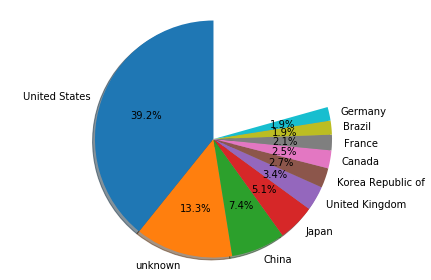

In [20]:
# Pie chart Browsers
labels = sorted_country_fraud.index.values[:10]
sizes = sorted_country_fraud[:10]/float(total_fraud)

# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

plt.tight_layout()
plt.show()

## 'browser' analysis

In [21]:
browser_fraud = fraud.groupby('browser').sum()
sorted_browser_fraud = browser_fraud['class'].sort_values(ascending=False)
sorted_browser_fraud

browser
Chrome     6069
IE         3187
FireFox    2342
Safari     2225
Opera       328
Name: class, dtype: int64

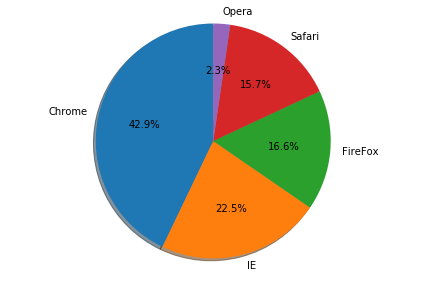

In [22]:
# Pie chart Browsers
labels = ['Chrome', 'IE', 'FireFox', 'Safari', 'Opera']
sizes = sorted_browser_fraud[:5]

# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

plt.tight_layout()
plt.show()

## 'source' analysis

In [23]:
source_fraud = fraud.groupby('source').sum()
sorted_source_fraud = source_fraud['class'].sort_values(ascending=False)
sorted_source_fraud

source
Ads       5513
SEO       5412
Direct    3226
Name: class, dtype: int64

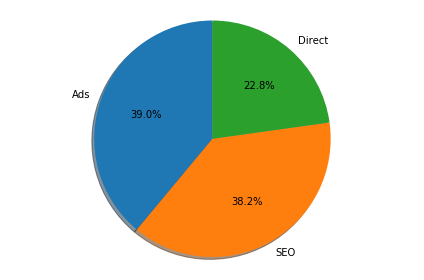

In [24]:
# Pie chart source
labels = ['Ads', 'SEO', 'Direct']
sizes = sorted_source_fraud[:3]

# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

plt.tight_layout()
plt.show()

## 'time_to_purchase' analysis

In [25]:
from datetime import datetime
purchase = fraud['purchase_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
signup = fraud['signup_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
fraud['time_to_purchase'] = purchase - signup
fraud['time_to_purchase'] = fraud['time_to_purchase'].apply(lambda x: x.days)
fraud.head(10)

user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   
5   159135  2015-05-21 06:03:03  2015-07-09 08:05:14              42   
6    50116  2015-08-01 22:40:52  2015-08-27 03:37:57              11   
7   360585  2015-04-06 07:35:45  2015-05-25 17:21:14              27   
8   159045  2015-04-21 23:38:34  2015-06-02 14:01:54              30   
9   182338  2015-01-25 17:49:49  2015-03-23 23:05:42              62   

       device_id source browser sex  age    ip_address  class  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0   
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0   
5  ALEYXFXINSXLZ    Ads  Chrome   M   18  2.809315e+09      0   
6  IWKVZHJOCLPUR    Ads  Chrome   F   19  3.987484e+09      0   
7  HPUCUYLMJBYFW    Ads   Opera   M   34  1.692459e+09      0   
8  ILXYDOZIHOOHT    SEO      IE   F   43  3.719094e+09      0   
9  NRFFPPHZYFUVC    Ads      IE   M   31  3.416747e+08      0   

   time_to_purchase  
0                52  
1                 0  
2                 0  
3                 5  
4                50  
5                49  
6                25  
7                49  
8                41  
9                57

In [26]:
y_fraud = fraud[fraud['class']==1]
time_to_purchase_fraud = y_fraud.groupby('time_to_purchase').size().to_frame(name = 'Count').reset_index()
time_to_purchase_fraud.head(20)

time_to_purchase  Count
0                  0   7648
1                  1     54
2                  2     41
3                  3     63
4                  4     49
5                  5     60
6                  6     49
7                  7     50
8                  8     50
9                  9     48
10                10     48
11                11     60
12                12     50
13                13     55
14                14     51
15                15     59
16                16     59
17                17     54
18                18     44
19                19     55

In [27]:
# Mean of 'time_to_purchase'
#y_fraud
sum = y_fraud['time_to_purchase'].sum()
num = y_fraud['time_to_purchase'].count()
num1 = y_fraud['time_to_purchase'].count() - 7648
mean = sum/num1
print (sum)
print (num)
print (num1)
print (mean)

393715
14151
6503
60.543595263724434


What kinds of users are more likely to be classified as at risk? What are their characteristics?
* Transactions come from USA.
* Transactions after openning account.
* Transactions come from Chrome browser.

## Model build

In [46]:
fraud.drop(['user_id', 'signup_time', 'purchase_time','device_id', 'ip_address', 'sex'], axis=1, inplace=True)
fraud.head()

purchase_value source browser  age  class        country
0              34    SEO  Chrome   39      0          Japan
1              16    Ads  Chrome   53      0  United States
2              15    SEO   Opera   53      1  United States
3              44    SEO  Safari   41      0        unknown
4              39    Ads  Safari   45      0  United States

In [47]:
fraud = pd.get_dummies(fraud, columns=['source', 'browser'])
fraud.head(5)

purchase_value  age  class        country  source_Ads  source_Direct  \
0              34   39      0          Japan           0              0   
1              16   53      0  United States           1              0   
2              15   53      1  United States           0              0   
3              44   41      0        unknown           0              0   
4              39   45      0  United States           1              0   

   source_SEO  browser_Chrome  browser_FireFox  browser_IE  browser_Opera  \
0           1               1                0           0              0   
1           0               1                0           0              0   
2           1               0                0           0              1   
3           1               0                0           0              0   
4           0               0                0           0              0   

   browser_Safari  
0               0  
1               0  
2               0  
3               1  
4               1

In [48]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = fraud['country']
le.fit(y)
y=le.fit_transform(y)
fraud['EncodedCountry'] = y
print('Classes:',le.classes_)
print('Response variable after encoding:',y)
fraud.head(5)
fraud.drop(['country'], axis=1, inplace=True)
fraud.head()

Classes: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bolivia' 'Bonaire; Sint Eustatius; Saba'
 'Bosnia and Herzegowina' 'Botswana' 'Brazil'
 'British Indian Ocean Territory' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Chile' 'China' 'Colombia' 'Congo'
 'Congo The Democratic Republic of The' 'Costa Rica' "Cote D'ivoire"
 'Croatia (LOCAL Name: Hrvatska)' 'Cuba' 'Curacao' 'Cyprus'
 'Czech Republic' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Ethiopia' 'European Union'
 'Faroe Islands' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Guadeloupe' 'Guam' 'Guatemala'
 'Haiti' 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Ir

purchase_value  age  class  source_Ads  source_Direct  source_SEO  \
0              34   39      0           0              0           1   
1              16   53      0           1              0           0   
2              15   53      1           0              0           1   
3              44   41      0           0              0           1   
4              39   45      0           1              0           0   

   browser_Chrome  browser_FireFox  browser_IE  browser_Opera  browser_Safari  \
0               1                0           0              0               0   
1               1                0           0              0               0   
2               0                0           0              1               0   
3               0                0           0              0               1   
4               0                0           0              0               1   

   EncodedCountry  
0              84  
1             171  
2             171  
3             181  
4             171

In [52]:
X = fraud.drop(['class'], axis=1)
y = fraud['class']

### Logistic Regression Model

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=420)

In [54]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
from sklearn.metrics import confusion_matrix
y_pred = LogReg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[34353,     0],
       [ 3425,     0]], dtype=int64)

In [56]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      1.00      0.95     34353
          1       0.00      0.00      0.00      3425

avg / total       0.83      0.91      0.87     37778



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random Forest Classifier Model

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
#Create training and testing sets
y_1 = fraud['class']
X_1 = fraud.drop(['class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.25, random_state=420)

In [58]:
rf = RandomForestClassifier(class_weight = {0: .9, 1: .1})
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
f1 = f1_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
accuracy = rf.score(X_test, y_test)
    
print ("f1 score: {}".format(f1))
print ("#######################")
print ("recall: {}".format(recall))
print ("#######################")
print ("precision: {}".format(precision))
print ("#######################")
print ("accuracy: {}".format(accuracy))

f1 score: 0.4312179739850217
#######################
recall: 0.3194160583941606
#######################
precision: 0.6634323832625834
#######################
accuracy: 0.9236063317274604
